# DB Cluster

In [31]:
import numpy as np
import math
import itertools

In [32]:
D = np.array([
    [0., 1., 3., 4., 7.],
    [1., 0., 4., 4., 8.],
    [3., 4., 0., 2., 8.],
    [4., 4., 2., 0., 7.],
    [7., 8., 8., 7., 0.]
])

In [33]:
def get_div(cluster):
    for i in range(1, math.ceil((len(cluster)+1)/2)):
        for cluster_1 in list(itertools.combinations(cluster, i)):
            cluster_2 = [item for item in cluster if item not in cluster_1]
            yield list(cluster_1), cluster_2

In [34]:
def variabilidad(cluster):
    s = 0
    for i in cluster:
        for j in cluster:
            if j > i:
                s += pow(D[i,j], 2)
    return s/(2*(len(cluster)**2))
                

In [35]:
cluster = range(D.shape[0])
def dbcluster(cluster):
    if len(cluster) == 1:
        return cluster
    
    vmin = None
    prev = None
    c1min = None
    c2min = None
    for c1,c2 in get_div(cluster):
        v = variabilidad(c1)*len(c1)+variabilidad(c2)*len(c2)
        if vmin == None or vmin > v:
            vmin = v
            prev = variabilidad(cluster)*len(cluster)
            c1min = c1
            c2min = c2
    
    return [prev, dbcluster(c1min), dbcluster(c2min)]    

In [36]:
Z = dbcluster(cluster)
Z

[28.799999999999997, [4], [7.75, [0.25, [0], [1]], [1.0, [2], [3]]]]

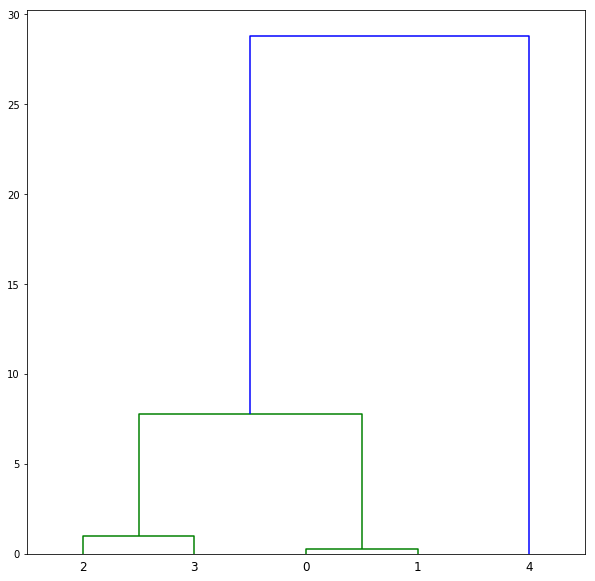

In [37]:
X = [
    [2., 3., 1., 2.],
    [0., 1., 0.25, 2.],
    [5., 6., 7.75, 4.],
    [7., 4., 28.79, 5.]
]
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)
plt.show()

# KMeans

In [39]:
from sklearn.datasets import load_iris

X, Y = load_iris(return_X_y=True)

In [40]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [50]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from scipy import stats

k = 6
l = 9
kmeans = KMeans(n_clusters=k+l, random_state=0)
kmeans.fit(X)
Y_labels = kmeans.predict(X)

Y_predict = np.zeros(Y.shape)

for cluster in range(k+l):
    cluster_index = np.argwhere(Y_labels==cluster)
    Y_predict_mode = stats.mode(Y[cluster_index])[0][0][0] # la clase que predice el cluster
    Y_predict[cluster_index] = Y_predict_mode

from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(linkage="ward", n_clusters=k)
Z_labels = ward.fit_predict(Y_predict.reshape(-1, 1))

ok = 0
total = 0
for cluster in range(k):
    cluster_index = np.argwhere(Z_labels==cluster)
    Z_predict = stats.mode(Y_predict[cluster_index])[0][0][0]
    ok += np.sum(Y[cluster_index] == Z_predict) # los elementos cuya del cluster cuya clase coincide la predicha
    total += len(Y[cluster_index])
print("Score: ", ok/total)

Score:  0.9733333333333334
